In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import DBSCAN
from collections import Counter
from pylab import rcParams

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import OPTICS

## 1 Density-based clustering: DBSCAN

In the last exercise we learned about the centroid-based clustering algorithm K-Means. In this exercise we will compare it with the density-based clustering algorithm DBSCAN, the agglomerative hierarchical clustering and the hierarchical density-based clustering algorithm OPTICS. We use the features ``mentality_interceptions`` and ``power_long_shots``.

For now we will have a look at DBSCAN.  
To do so, estimate a suitable value for $\epsilon$.
Set *MinPts=30* (necessary because the data is relativaly dense and low dimensional) and use a k-distance plot for estimating a proper range for $\epsilon$. For creating this plot, we propose the following steps:
- use the *kneighbors_graph()* function of sklearn for getting the distance of each point to its $k$ (*MinPts*) neighbors <br>
(http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html)
- convert the result to a 2d array
- get the maximum of each row
- sort these values and create the plot

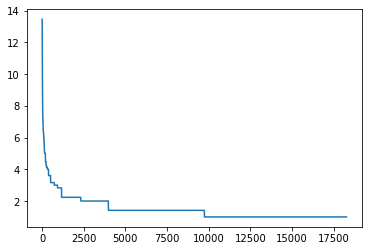

In [17]:
# Follow the suggested steps to plot a k-distance plot. 
csv = pd.read_csv('data/fifa_20.csv')

df = csv.copy(deep=False)
df = df[['mentality_interceptions','power_long_shots']]
newDf = df[(df['mentality_interceptions'].notna())]
newDf = df[(df['power_long_shots'].notna())]
newDf2 = newDf

#convert to numpy array
newDf = newDf.values
minPts = 30

##convert the result to a 2d array
N = kneighbors_graph(newDf, minPts, mode='distance')
N = N.toarray()

##get the max of a row
N = np.amax(N, 1)

# ##sort these values
N = -np.sort(-N)

##create the plot
plt.plot(N)
plt.show()    


Use the estimated parameter range for DBSCAN (http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Visualize the result. Adjust the parameters to get better results and create one plot with and one without the detected noise (it has cluster label < 0).

In [75]:
# Run DBSCAN

model = DBSCAN(eps=2.2, min_samples=30, metric='euclidean').fit(newDf)

#seperate outliers
outliers_df = newDf2[model.labels_ == -1] 
clusters_df = newDf2[model.labels_ != -1] 


#set colors
colors = model.labels_
color_clusters = colors[colors != -1]

# color_clusters = {0:'blue', 1:'orange', 2:'green', 3:'skyblue'}

color_outliers = 'black'

#get info


clusters = Counter(model.labels_)
print(clusters)
print(newDf2[model.labels_ != -1].head())


Counter({1: 15057, 0: 1987, -1: 1192, 3: 23, 2: 19})
    mentality_interceptions  power_long_shots
3                        19                12
6                        22                10
13                       11                14
25                       27                18
26                       30                77


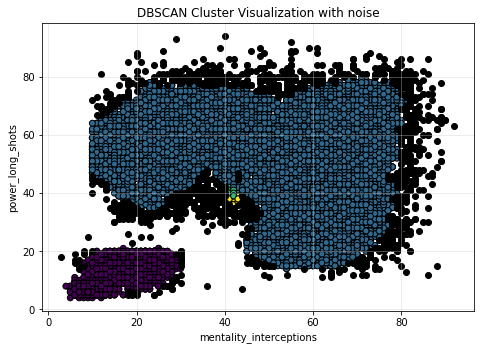

In [88]:
# Visualization with noise
fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])

ax.scatter(clusters_df['mentality_interceptions'], clusters_df['power_long_shots'], c = color_clusters, edgecolors='black')
ax.scatter(outliers_df['mentality_interceptions'], outliers_df['power_long_shots'], c = color_outliers, edgecolors='black')

ax.set_xlabel('mentality_interceptions')
ax.set_ylabel('power_long_shots')

plt.title('DBSCAN Cluster Visualization with noise')

plt.grid(which='major', color='#cccccc', alpha=0.45)

plt.show()

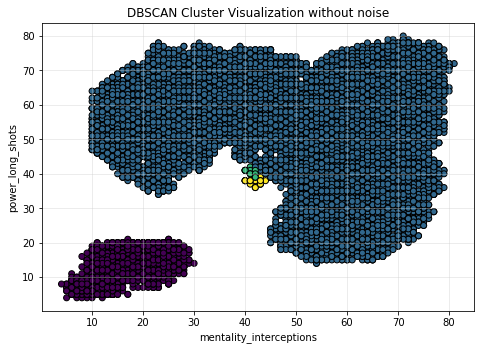

In [87]:
# Visualization without noise 
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

ax.scatter(clusters_df['mentality_interceptions'], clusters_df['power_long_shots'], c = color_clusters, edgecolors='black')

ax.set_xlabel('mentality_interceptions')
ax.set_ylabel('power_long_shots')

plt.grid(which='major', color='#cccccc', alpha=0.45)

plt.title('DBSCAN Cluster Visualization without noise')
plt.show()

# 2 Agglomerative Hierarchical Clustering

Secondly we will look at agglomerative hierarchical clustering.  
Use the sklearn implementation of agglomerative clustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) to cluster the same data as before. Try different numbers of clusters (the parameter n_clusters) and see which work well.  
Visualize the resulting clusters with a scatterplot.


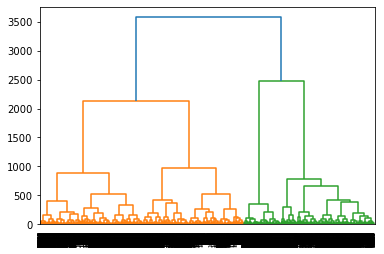

In [93]:
# Run Agglomerative Hierarchical Clustering
points = newDf
dendogram = sch.dendrogram(sch.linkage(points, method='ward'))

{0, 1, 2, 3}


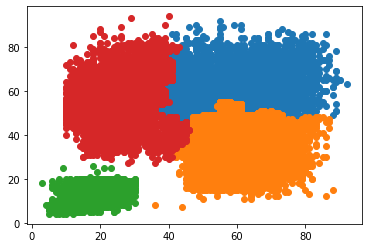

In [113]:
#perform the actual clustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

y_hc = hc.fit_predict(points)

hcLabel = hc.labels_

print(set(y_hc))

# Visualization
plt.scatter(points[y_hc == 0,0], points[y_hc == 0,1] ) 
plt.scatter(points[y_hc == 1,0], points[y_hc == 1,1])
plt.scatter(points[y_hc == 2,0], points[y_hc == 2,1] )
plt.scatter(points[y_hc == 3,0], points[y_hc == 3,1])



# 3 Hierarchical Density-based Clustering: OPTICS

The last clustering algorithm we will look at is OPTICS.  
Use the sklearn implementation of OPTICS (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html) to cluster the same data as before. Set the min_samples to 30 and use a min_cluster_size of 0.05.  
Plot the resulting clusters with and without noise. Noise can be identified the same as in DBSCAN (label of the cluster is < 0). 

**NOTE:** OPTICS may take some time to process. Don't be alarmed if your code takes a minute or two to calculate the clusters.

In [108]:
# Run Optics
clusteringOpt = OPTICS(min_samples=30, min_cluster_size=0.05).fit(newDf)

print(Counter(clusteringOpt.labels_))

#seperate noise
outliers_df = newDf2[clusteringOpt.labels_ == -1] 
clusters_df = newDf2[clusteringOpt.labels_ != -1] 


#set colors
colors = clusteringOpt.labels_
color_clusters = colors[colors != -1]
color_outliers = 'black'

Counter({-1: 7884, 1: 6281, 0: 2332, 2: 1781})


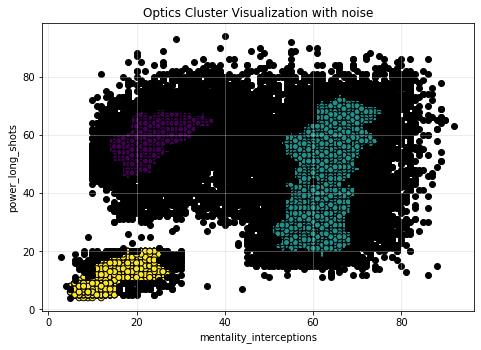

In [109]:
# Visualization with noise
fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])

ax.scatter(clusters_df['mentality_interceptions'], clusters_df['power_long_shots'], c = color_clusters, edgecolors='black')
ax.scatter(outliers_df['mentality_interceptions'], outliers_df['power_long_shots'], c = color_outliers, edgecolors='black')

ax.set_xlabel('mentality_interceptions')
ax.set_ylabel('power_long_shots')

plt.title('Optics Cluster Visualization with noise')

plt.grid(which='major', color='#cccccc', alpha=0.45)

plt.show()

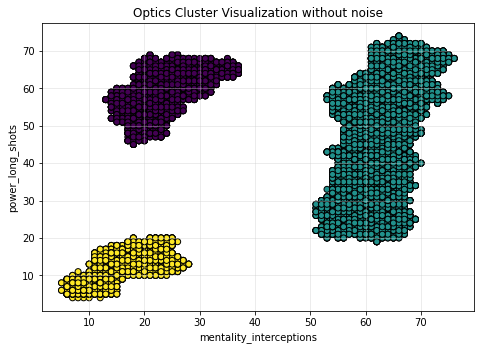

In [110]:
# Visualization without noise
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

ax.scatter(clusters_df['mentality_interceptions'], clusters_df['power_long_shots'], c = color_clusters, edgecolors='black')

ax.set_xlabel('mentality_interceptions')
ax.set_ylabel('power_long_shots')

plt.grid(which='major', color='#cccccc', alpha=0.45)

plt.title('Optics Cluster Visualization without noise')
plt.show()